# Fine detection

In [1]:
import sys
sys.path.insert(0, '../python')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy
from detector import detector
from parseData import parseChar2013
from arrayOp import stack2image
from imgOp import image_load, image2edge, image_norm, imShow, image2bb, image_save, image_norm
from fileOp import codebook_load, data_load, pickle_load
from featExt import maximalResize, conv2d
from scipy.misc import imresize
import pickle

/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [6]:
# Generate fine detector hotmaps
psize = 8
ssize = 1
nob = 3
ratio = 0.95
rpower = ratio ** numpy.asarray(range(20))
para0 = 0.8
para1 = 0.3
imdir = '../testResult/'
codeBookName = 'codeBook.npy'
classifierName = 'Classifier_rect.pkl'
resdir = '../testResult/'
parseGTName = 'parsedGT'
cdirname = '../data/ex1/'

codebook = codebook_load(codeBookName)
groundtruth = pickle_load(parseGTName, cdirname)
clf = pickle.load(open(classifierName))

labelMode = 'foreground'
featureMode = 'local'
edgeMode = True
mydetector = detector(codebook, groundtruth,
                      psize, ssize, nob, rpower, 
                      para0, para1,
                      labelMode, featureMode, edgeMode)

raw = image_load('testROI.png', imdir)
raw = imresize(raw, 1.0/4, 'bilinear')
raw = raw.transpose()
res_stack = mydetector.multiscale_test(raw, clf)

In [10]:
raw

array([[184, 190, 189, ..., 159, 158, 160],
       [187, 190, 190, ..., 171, 159, 155],
       [189, 190, 190, ..., 164, 159, 161],
       ..., 
       [158, 178, 178, ..., 155, 153, 143],
       [154, 177, 177, ..., 151, 149, 138],
       [151, 177, 176, ..., 148, 144, 137]], dtype=uint8)

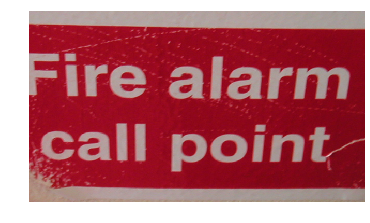

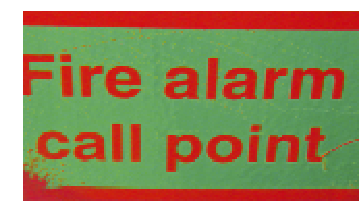

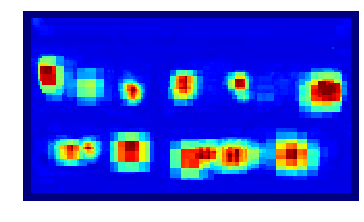

In [3]:
from scipy.misc import imread
from skimage import color
import os

raw = imread(os.path.join(imdir, 'testROI.png'))
imShow(numpy.transpose(raw, [1, 0, 2]))# show rgb image
raw = color.rgb2lab(raw)
raw = imresize(raw, 1.0/4, 'bilinear')
imShow(numpy.transpose(raw, [1, 0, 2]))# show lab image
predim = stack2image(res_stack[0])
predim = numpy.float32(predim)
imShow(numpy.transpose(predim, [1, 0,]))# show prediction map

In [9]:
from numpy import histogram
import matplotlib.pyplot as plt

In [10]:
print raw.shape
print predim.shape

(162, 92, 3)
(162, 92)


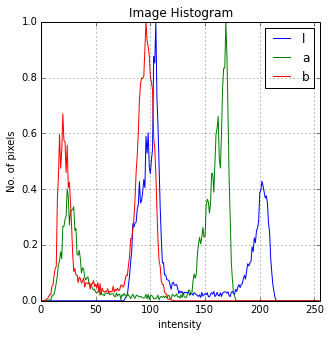

In [11]:
raw1 = raw[:, :, 0]
raw2 = raw[:, :, 1]
raw3 = raw[:, :, 2]
hist1, _ = histogram(raw1, bins = 255, range=(0, 255))
hist2, _ = histogram(raw2, bins = 255, range=(0, 255))
hist3, _ = histogram(raw3, bins = 255, range=(0, 255))
hist1 = numpy.float64(hist1)
hist1 = hist1-numpy.min(hist1)
hist1 = hist1/numpy.max(hist1)
hist2 = numpy.float64(hist2)
hist2 = hist2-numpy.min(hist2)
hist2 = hist2/numpy.max(hist2)
hist3 = numpy.float64(hist3)
hist3 = hist3-numpy.min(hist3)
hist3 = hist3/numpy.max(hist3)
fig, ax = plt.subplots(figsize = (5, 5))
plt.plot(hist1, label = 'l')
plt.plot(hist2, label = 'a')
plt.plot(hist3, label = 'b')
plt.grid(True)
ax.set_xlim([0, 255])
#ax.set_ylim([0, 255])
ax.legend()
plt.xlabel('intensity')
plt.ylabel('No. of pixels')
plt.title('Image Histogram')

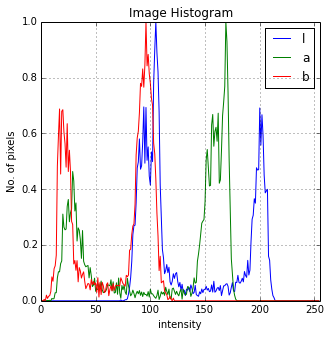

In [12]:
raw1 = raw[:, :, 0]
raw2 = raw[:, :, 1]
raw3 = raw[:, :, 2]
hist1, _ = histogram(raw1, bins = 255, range=(0, 255), weights = predim)
hist2, _ = histogram(raw2, bins = 255, range=(0, 255), weights = predim)
hist3, _ = histogram(raw3, bins = 255, range=(0, 255), weights = predim)
hist1 = numpy.float64(hist1)
hist1 = hist1-numpy.min(hist1)
hist1 = hist1/numpy.max(hist1)
hist2 = numpy.float64(hist2)
hist2 = hist2-numpy.min(hist2)
hist2 = hist2/numpy.max(hist2)
hist3 = numpy.float64(hist3)
hist3 = hist3-numpy.min(hist3)
hist3 = hist3/numpy.max(hist3)
fig, ax = plt.subplots(figsize = (5, 5))
plt.plot(hist1, label = 'l')
plt.plot(hist2, label = 'a')
plt.plot(hist3, label = 'b')
plt.grid(True)
ax.set_xlim([0, 255])
#ax.set_ylim([0, 255])
ax.legend()
plt.xlabel('intensity')
plt.ylabel('No. of pixels')
plt.title('Image Histogram')

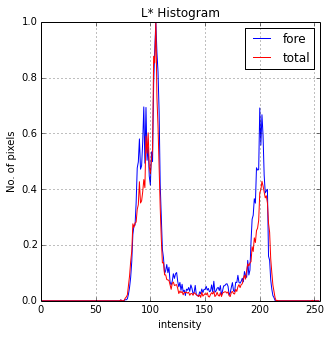

In [13]:
raw1 = raw[:, :, 0]
hist1, _ = histogram(raw1, bins = 255, range=(0, 255), weights = predim)
hist2, _ = histogram(raw1, bins = 255, range=(0, 255))
hist1 = numpy.float64(hist1)
hist1 = hist1-numpy.min(hist1)
hist1 = hist1/numpy.max(hist1)
hist2 = numpy.float64(hist2)
hist2 = hist2-numpy.min(hist2)
hist2 = hist2/numpy.max(hist2)
fig, ax = plt.subplots(figsize = (5, 5))
plt.plot(hist1, label = 'fore')
plt.plot(hist2, label = 'total', c = 'r')
plt.grid(True)
ax.set_xlim([0, 255])
#ax.set_ylim([0, 255])
ax.legend()
plt.xlabel('intensity')
plt.ylabel('No. of pixels')
plt.title('L* Histogram')

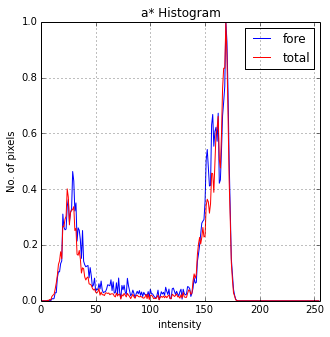

In [15]:
raw2 = raw[:, :, 1]
hist1, _ = histogram(raw2, bins = 255, range=(0, 255), weights = predim)
hist2, _ = histogram(raw2, bins = 255, range=(0, 255))
hist1 = numpy.float64(hist1)
hist1 = hist1-numpy.min(hist1)
hist1 = hist1/numpy.max(hist1)
hist2 = numpy.float64(hist2)
hist2 = hist2-numpy.min(hist2)
hist2 = hist2/numpy.max(hist2)
fig, ax = plt.subplots(figsize = (5, 5))
plt.plot(hist1, label = 'fore')
plt.plot(hist2, label = 'total', c = 'r')
plt.grid(True)
ax.set_xlim([0, 255])
#ax.set_ylim([0, 255])
ax.legend()
plt.xlabel('intensity')
plt.ylabel('No. of pixels')
plt.title('a* Histogram')

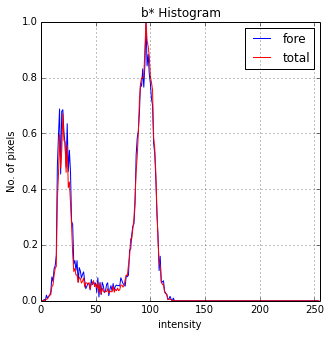

In [14]:
raw3 = raw[:, :, 2]
hist1, _ = histogram(raw3, bins = 255, range=(0, 255), weights = predim)
hist2, _ = histogram(raw3, bins = 255, range=(0, 255))
hist1 = numpy.float64(hist1)
hist1 = hist1-numpy.min(hist1)
hist1 = hist1/numpy.max(hist1)
hist2 = numpy.float64(hist2)
hist2 = hist2-numpy.min(hist2)
hist2 = hist2/numpy.max(hist2)
fig, ax = plt.subplots(figsize = (5, 5))
plt.plot(hist1, label = 'fore')
plt.plot(hist2, label = 'total', c = 'r')
plt.grid(True)
ax.set_xlim([0, 255])
#ax.set_ylim([0, 255])
ax.legend()
plt.xlabel('intensity')
plt.ylabel('No. of pixels')
plt.title('b* Histogram')

In [6]:
raw = numpy.uint8(raw)
l = raw[:, :, 0][:]
a = raw[:, :, 1][:]
b = raw[:, :, 2][:]

thre = 128
lf = raw[:, :, 0][predim > thre]
af = raw[:, :, 1][predim > thre]
bf = raw[:, :, 2][predim > thre]

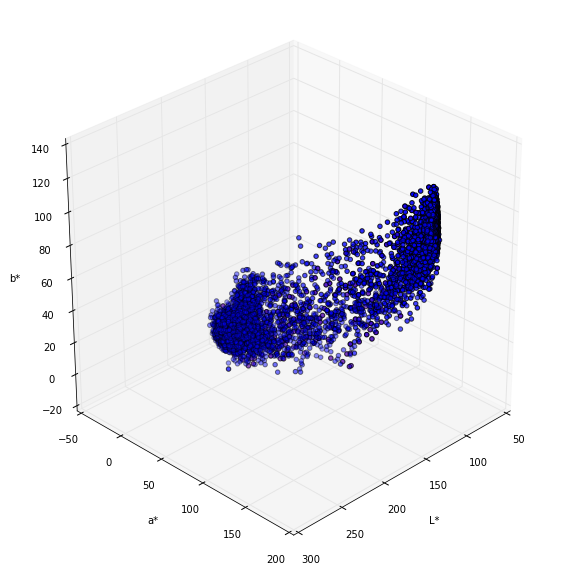

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(l, a, b, alpha = 1)
ax.scatter(lf, af, bf, c='r')
ax.set_xlabel('L*')
ax.set_ylabel('a*')
ax.set_zlabel('b*')

ax.set_xlim([50, 300])
ax.set_ylim([-50, 200])
ax.set_zlim([-20, 140])
ax.view_init(elev=30, azim=45)

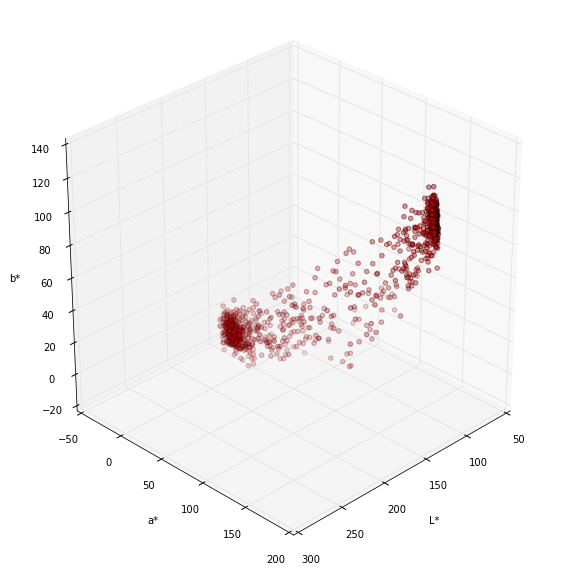

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lf, af, bf, c='r', alpha = 0.5)
ax.set_xlabel('L*')
ax.set_ylabel('a*')
ax.set_zlabel('b*')

ax.set_xlim([50, 300])
ax.set_ylim([-50, 200])
ax.set_zlim([-20, 140])
ax.view_init(elev=30., azim=45)

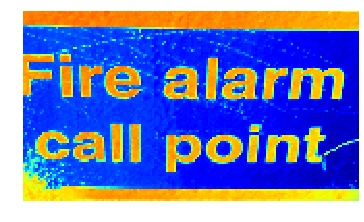

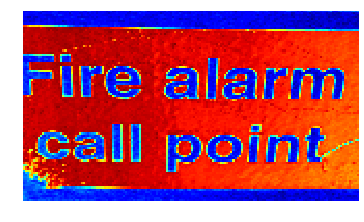

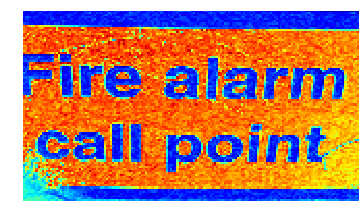

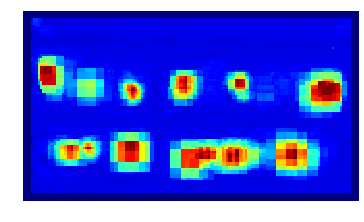

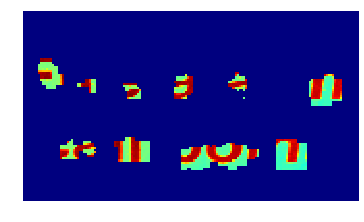

In [14]:
imShow(raw[:,:,0].transpose())
imShow(raw[:,:,1].transpose())
imShow(raw[:,:,2].transpose())
indim = predim > thre
maskim = numpy.multiply(raw[:,:,0], indim)
imShow(predim.transpose())
imShow(maskim.transpose())

#Elastic Method

In [1]:
import sys
sys.path.insert(0, '../python')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy
from detector import detector
from parseData import parseChar2013
from arrayOp import stack2image
from imgOp import image_load, image2edge, image_norm, imShow, image2bb, image_save, image_norm
from fileOp import codebook_load, data_load, pickle_load
from featExt import maximalResize, conv2d
from scipy.misc import imresize
import pickle

/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [7]:
# Generate fine detector hotmaps
psize = 8
ssize = 1
nob = 3
ratio = 0.95
rpower = ratio ** numpy.asarray(range(20))
para0 = 0.8
para1 = 0.3
imdir = '../testResult/'

codeBookName = 'codeBook.npy'
codebook = codebook_load(codeBookName)

classifierName = 'Classifier_rect.pkl'
clf = pickle.load(open(classifierName))

parseGTName = 'parsedGT'
cdirname = '../data/ex1/'
groundtruth = pickle_load(parseGTName, cdirname)

labelMode = 'foreground'
featureMode = 'local'
edgeMode = True
mydetector = detector(codebook, groundtruth,
                      psize, ssize, nob, rpower, 
                      para0, para1,
                      labelMode, featureMode, edgeMode)

raw = image_load('testROI.png', imdir)
raw = imresize(raw, 1.0/4, 'bilinear')
raw = raw.transpose()
m0, n0 = raw.shape
ef = (x*0.1 for x in range(3, 20, 2)) # elastic factor

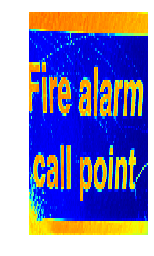

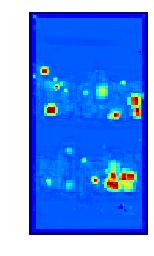

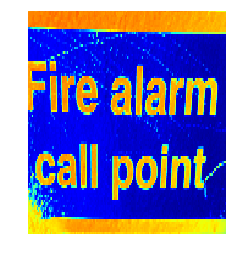

Exception in thread Thread-133:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/socket.c:6032)
ZMQError: Address already in use

Exception in thread Thread-142:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zm

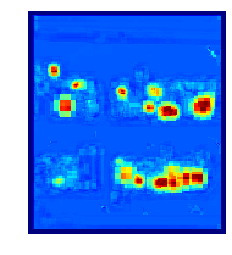

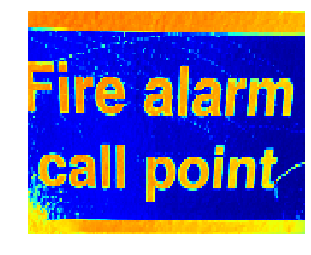

Exception in thread Thread-205:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/socket.c:6032)
ZMQError: Address already in use

Exception in thread Thread-205:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zm

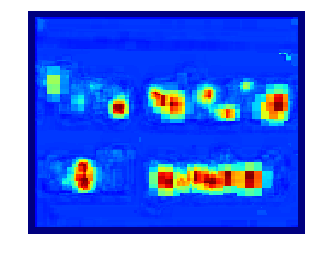

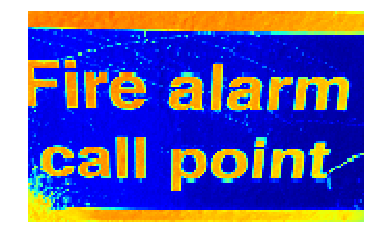

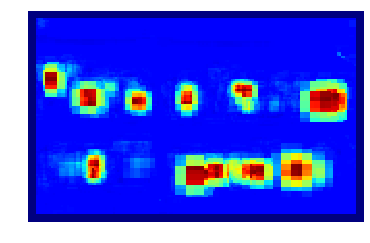

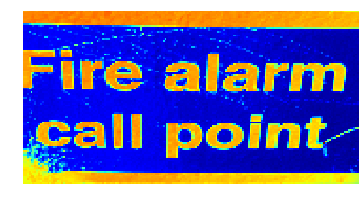

Exception in thread Thread-355:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/socket.c:6032)
ZMQError: Address already in use

Exception in thread Thread-355:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zm

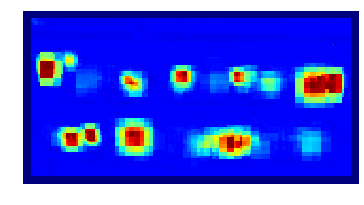

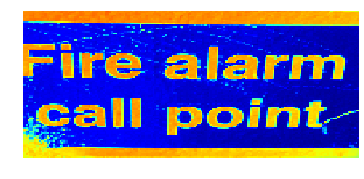

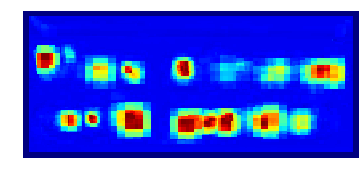

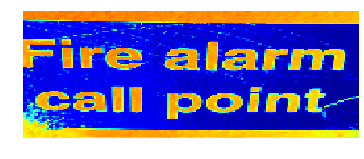

Exception in thread Thread-451:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/socket.c:6032)
ZMQError: Address already in use



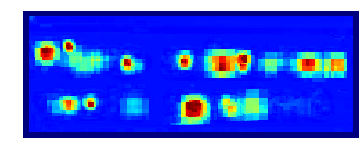

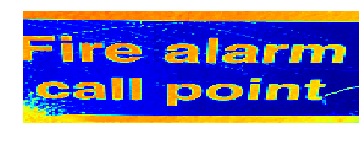

Exception in thread Thread-502:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/socket.c:6032)
ZMQError: Address already in use

Exception in thread Thread-502:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zm

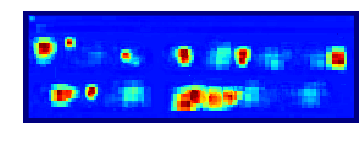

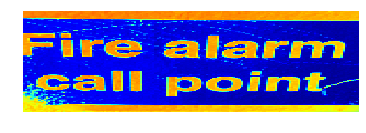

Exception in thread Thread-571:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 551, in __bootstrap_inner
    self.run()
  File "/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/zmq/utils/garbage.py", line 34, in run
    s.bind(self.gc.url)
  File "socket.pyx", line 444, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:4076)
  File "checkrc.pxd", line 21, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/socket.c:6032)
ZMQError: Address already in use



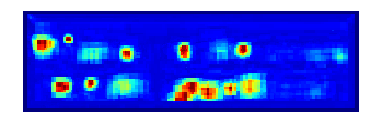

In [24]:
elastic_stack = []
for i in ef:
    if i <= 1:
        m = int(m0*i) 
        n = n0
    else:
        n = int(n0/i)
        m = m0
    img = imresize(raw, (m, n), interp = 'nearest')
    imShow(img.transpose())
    
    res_stack = mydetector.multiscale_test(img, clf)
    elastic_stack.append(res_stack)
    
    predim = stack2image(res_stack[0])
    imShow(predim.transpose())


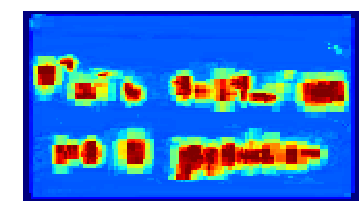

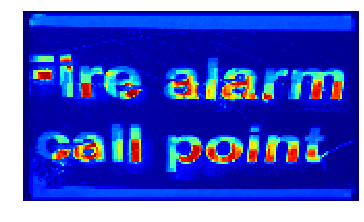

In [26]:
pred_stack = []
for s in elastic_stack:
    predim = stack2image(s[0])
    predim = imresize(predim, (m0, n0), interp = 'nearest')
    pred_stack.append(predim)
    
totalim = stack2image(pred_stack)
#totalim = imresize(totalim, (162, 92))
totalim = numpy.float32(totalim)
imShow(totalim.transpose())
imShow(image_norm(numpy.multiply(totalim, raw)).transpose())
image_save(totalim, 'ElasticFineDetector.png', '.')

# CC Extraction

In [15]:
raw = image_load('testROI.png', imdir)
raw = imresize(raw, 1.0/4, 'bilinear')
raw = raw.transpose()

predim = image_load('ElasticFineDetector.png', '.')
imShow(raw.transpose())
imShow(predim.transpose())
alpha = 1
beta = 64
seedim = (predim - alpha * edgeim) > beta
imShow(seedim.transpose())

TypeError: unbound method __init__() must be called with Affine2DBase instance as first argument (got Affine2D instance instead)

In [ ]:
from skimage.measure import label as sklabel
from scipy.ndimage import label as splabel
from skimage.color import label2rgb
from scipy.ndimage.morphology import binary_dilation 

edgeim = image2edge(raw)
imShow(edgeim.transpose())
ccim, label = splabel(seedim)
imShow(ccim.transpose())

In [237]:
prethre = 0.2
cthre = 255
ethre = 128

In [1]:
finalim = numpy.zeros(raw.shape)
for i in range(label):
    if i == 0:
        continue
    cim = numpy.uint8(ccim == i)

    cdiffim = abs(raw - baseColor)
    baseColor = numpy.mean(raw[cim])
    for j in range(200):
        newcim = binary_dilation(cim)
        i_difim = newcim - cim
        i_colorim = numpy.multiply(cdiffim, i_difim)
        i_edgeim = numpy.multiply(edgeim, i_difim)
        i_color_map = i_colorim < cthre
        i_edge_map = i_edgeim < ethre

        r_difim = numpy.multiply(numpy.multiply(i_difim, i_color_map), i_edge_map) 
        cim = cim + r_difim
        pre = float(numpy.multiply(cim, seedim).sum())/ cim.sum()
        if pre < prethre:
            break
    else:
        #imShow(cim.transpose())
        #print pre
        finalim = finalim + cim


NameError: name 'numpy' is not defined

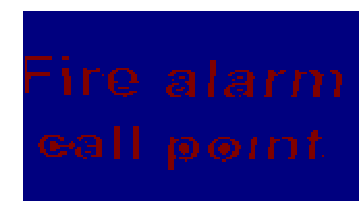

In [236]:
finalim = finalim > 0
imShow(finalim.transpose())

In [9]:
raw

array([[184, 190, 189, ..., 159, 158, 160],
       [187, 190, 190, ..., 171, 159, 155],
       [189, 190, 190, ..., 164, 159, 161],
       ..., 
       [158, 178, 178, ..., 155, 153, 143],
       [154, 177, 177, ..., 151, 149, 138],
       [151, 177, 176, ..., 148, 144, 137]], dtype=uint8)